In [1]:
!pip list


Package                           Version
--------------------------------- ------------------
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           6.1.0
astropy-iers-data                 0.2024.6.3.0.31.14
astto

In [2]:
!pip install konlpy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.4 MB 393.8 kB/s eta 0:00:50
   ---------------------------------------- 0.1/19.4 MB 365.7 kB/s eta 0:00:53
   ---------------------------------------- 0.2/19.4 MB 1.1 MB/s eta 0:00:18
    --------------------------------------- 0.5/19.4 MB 2.0 MB/s eta 0:00:10
   - -------------------------------------- 0.7/19.4 MB 2.4 MB/s eta 0:00:08
   - -------------------------------------- 0.9/19.4 MB 2.9 MB/s eta 0:00:07
   -- ------------------------------------- 1.2/19.4 MB 3.2 MB/s eta 0:00:06
   -- ------------------------------------- 1.4/19.4 MB 3.5 MB/s eta 0:00:06
   --- ------------------------------------ 1.8/19.4 MB 4.0 MB/s eta 0:00:05
   ---- ----------------------------------- 2.3/19.4 MB 4.5 MB/s eta 0:00:04
   ----- -------

In [3]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [4]:
pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']


In [5]:
pprint(kkma.pos(u'오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^'))

[('오류', 'NNG'),
 ('보고', 'NNG'),
 ('는', 'JX'),
 ('실행', 'NNG'),
 ('환경', 'NNG'),
 (',', 'SP'),
 ('에러', 'NNG'),
 ('메세지', 'NNG'),
 ('와', 'JKM'),
 ('함께', 'MAG'),
 ('설명', 'NNG'),
 ('을', 'JKO'),
 ('최대한', 'NNG'),
 ('상세히', 'MAG'),
 ('!', 'SF'),
 ('^^', 'EMO')]


In [6]:
import json
import urllib.request
client_id = "yBfmPoGPjrS2BUrYnvTm"
client_secret = "4F613hH8eD"
searchText = input('검색할 단어 입력: ')
encText = urllib.parse.quote(searchText) # 인자로 주어진 문자열에서 특수문자를 문자열로 변환(utf-8)
url = "https://openapi.naver.com/v1/search/news.json?query=" + encText + "&display=100" # JSON 결과
#url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
    response_body = json.loads(response_body.decode('utf-8'))
    total = response_body['total'] # 총 검색 결과 개수
    count = 0;
    jsonData = []
    print('전체 검색 수: %d개'%total)
    for item in response_body['items']:
        count = count + 1
        title = item['title'] # 뉴스 기사의 제목
        originallink = item['originallink'] # 뉴스 기사 원문의 URL
        description = item['description'] # 뉴스 기사의 내용을 요약한 패시지 정보
        jsonData.append({'count':count, 'title':title, 'originallink':originallink, 'description':description})
        with open('C:/Python/naver_news_%s.json'%searchText, 'w', encoding='utf8') as fout:
            jsonFile = json.dumps(jsonData, indent=4, sort_keys=True, ensure_ascii=False)
            fout.write(jsonFile)
else:
    print("Error Code:" + rescode)


검색할 단어 입력:  방학


{
	"lastBuildDate":"Fri, 15 Nov 2024 14:32:06 +0900",
	"total":963300,
	"start":1,
	"display":100,
	"items":[
		{
			"title":"진주시 미래세대 행복기금, 내년 운용은…장학·탐방 확대",
			"originallink":"https:\/\/www.newsis.com\/view\/NISX20241115_0002960395",
			"link":"https:\/\/n.news.naver.com\/mnews\/article\/003\/0012906280?sid=102",
			"description":"또 여름과 겨울<b>방학<\/b> 기간 중 미국 아이비리그 대학 탐방과 유엔(UN)본부, 국회의사당 등의 견학도 한다.... 운영시기는 여름<b>방학<\/b>과 겨울<b>방학<\/b> 등이다. 명문대학 탐방, 미래직업 체험활동, 청소년 진로탐색, 영어권 국가... ",
			"pubDate":"Fri, 15 Nov 2024 14:29:00 +0900"
		},
		{
			"title":"대구북부경찰서, 수능 후 청소년 선도·보호 캠페인 실시",
			"originallink":"https:\/\/www.imaeil.com\/page\/view\/2024111514245140099",
			"link":"https:\/\/n.news.naver.com\/mnews\/article\/088\/0000915215?sid=004",
			"description":"신동연 북부경찰서장은 &quot;졸업식과 동계<b>방학<\/b>까지 청소년 선도·보호 활동 집중기간으로 지정해 비행·탈선을 예방하고 건전한 청소년 문화를 육성하고자 노력하겠다&quot;고 했다.",
			"pubDate":"Fri, 15 Nov 2024 14:26:00 +0900"
		},
		{
			"title":"정치가 지겨운 청년들의 정치 페스티발 &quot;우리 정치 정상 영업합니다&quot; 23...",


In [9]:
import json
filePath = 'c:/Python/naver_news_방학.json'
with open(filePath, 'r', encoding='utf8') as fin:
    descriptions = json.load(fin) # 리스트로 저장
    for description in descriptions:
        print(description['description'])

또 여름과 겨울<b>방학</b> 기간 중 미국 아이비리그 대학 탐방과 유엔(UN)본부, 국회의사당 등의 견학도 한다.... 운영시기는 여름<b>방학</b>과 겨울<b>방학</b> 등이다. 명문대학 탐방, 미래직업 체험활동, 청소년 진로탐색, 영어권 국가... 
신동연 북부경찰서장은 &quot;졸업식과 동계<b>방학</b>까지 청소년 선도·보호 활동 집중기간으로 지정해 비행·탈선을 예방하고 건전한 청소년 문화를 육성하고자 노력하겠다&quot;고 했다.
폐교 결정 과정을 다루는 '미래 우리 학교는?'에서는 ▲김연지(<b>방학</b>중학교), ▲변지민(선덕중학교), 윤지선(정의여자중학교)가 토론자로 나온다. 지역 청년 정치를 다루는 '지역에서 청년 정치인이 시민과 함께 하기 위한... 
특히 2015년 청소년 교류 세부 합의서를 체결한 후에는 <b>방학</b> 기간 청소년대표단이 격년으로 상호 방문하며 청소년 교류 활동을 펼쳐왔다. 이번 구로구 청소년대표단의 남쿠칭시 방문은 2025년 2월 11일부터 18일까지... 
서울 마포구는 초등학생 대상의 '2024년 겨울<b>방학</b> 영어 캠프' 참가자를 모집한다고 15일 밝혔다. 모집 대상은... 박강수 마포구청장은 &quot;이번 겨울<b>방학</b> 영어 캠프는 우리 학생들에게 영어를 재미있고 효과적으로 배울... 
특히 2015년 청소년 교류 세부 합의서를 체결한 후에는 <b>방학</b> 기간 청소년대표단이 격년으로 상호 방문하며 청소년 교류 활동을 펼쳐왔다. 이번 구로구 청소년대표단의 남쿠칭시 방문은 2025년 2월 11일부터 18일까지... 
특히, 수능 직후의 겨울<b>방학</b>은 대학 입학 전 자유로운 시간이 많아 시력교정 수술에 도전하기에 적합하다고... 겨울<b>방학</b>은 충분한 회복 기간을 확보할 수 있을 뿐만 아니라 대학 입학 전 새로운 환경에 적응하기 전에... 
이번 캠페인은 수학능력시험이 끝나고 동절기 <b>방학</b> 기간 인터넷 사용이 많아질 것으로 예상되는 가운데 최근 급증하는 첨

In [11]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 325.1 kB/s eta 0:00:01
   --------------------- ------------------ 163.8/301.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.7 MB/s eta 0:00:00


청소년 : 55개
겨울 : 47개
기간 : 34개
수능 : 33개
활동 : 31개
학생 : 30개
이번 : 28개
영어 : 20개
프로그램 : 19개
동계 : 18개
교육 : 18개
선도 : 17개
지원 : 17개
학교 : 16개
교육청 : 15개
운영 : 14개
캠프 : 14개
학습 : 14개
교류 : 13개
생활 : 13개
통해 : 13개
보호 : 12개
지역 : 12개
학기 : 12개
여름 : 11개
대표 : 11개
방문 : 11개
급식 : 11개
진행 : 11개
학년 : 11개
시기 : 10개
대상 : 10개
이후 : 10개
모집 : 9개
환경 : 9개
동안 : 9개
아이 : 9개
경찰청 : 9개
대학 : 8개
체험 : 8개
위해 : 8개
시즌 : 8개
이용 : 8개
온라인 : 8개
준비 : 8개
지도 : 8개
비행 : 7개
예방 : 7개
수학 : 7개
센터 : 7개
제공 : 7개
또한 : 7개
합동 : 7개
경찰서 : 6개
졸업식 : 6개
초등학생 : 6개
시간 : 6개
교정 : 6개
현재 : 6개
가지 : 6개
한편 : 6개
추진 : 6개
단체 : 6개
범죄 : 6개
중학교 : 5개
세부 : 5개
합의 : 5개
체결 : 5개
격년 : 5개
상호 : 5개
구로구 : 5개
쿠칭 : 5개
서울 : 5개


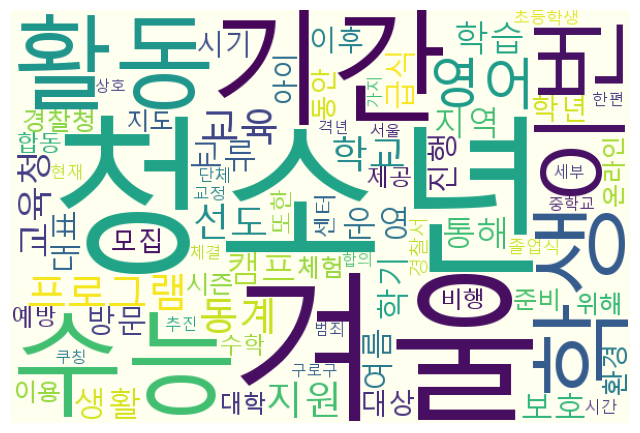

In [12]:
import json
import re # 정규 표현식
from konlpy.tag import Okt # 한글 품사 태깅 (Hannanum, Kkma, Komoran, .. )
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

filePath = 'c:/Python/naver_news_방학.json'
contents = ''
with open(filePath, 'r', encoding='utf8') as fin:
    descriptions = json.load(fin) # 리스트로 저장
    for description in descriptions:
        if 'description' in description.keys(): # 모든 한글 음절(가~힣)만 남기고 나머지는 공백처리
            contents += re.sub(r'[^\uAC00-\uD7A3]',' ', description['description'])
    nlp = Okt()
    nouns = nlp.nouns(contents) # 명사만 추출
    count = Counter(nouns) # 명사별 빈도수를 계산
    word_count = dict()
    for tag, counts in count.most_common(100): # 빈도수 상위 100개 중에서
        if(len(str(tag)) > 1): # 2글자 이상
            if str(tag) == '방학': continue
            word_count[tag] = counts
            print('%s : %d개'%(tag, counts))
    font_path = 'c:/Windows/fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    wc = WordCloud(font_path=font_path, background_color='ivory', width=600, height=400)
    cloud = wc.generate_from_frequencies(word_count)
    plt.figure(figsize=(8,8))
    plt.imshow(cloud)
    plt.axis('off') # x축, y축이 보이지 않게 한다.
    plt.show()
    cloud.to_file('C:/Python/방학_wordcloud.jpg')

검색할 단어 입력:  축구


{
	"lastBuildDate":"Fri, 15 Nov 2024 15:56:22 +0900",
	"total":4909787,
	"start":1,
	"display":100,
	"items":[
		{
			"title":"김천, 수험생 위한 핫팩 나눔 행사 진행",
			"originallink":"https:\/\/www.besteleven.com\/news\/articleView.html?idxno=227740",
			"link":"https:\/\/m.sports.naver.com\/kfootball\/article\/343\/0000130059",
			"description":"김천상무프로<b>축구<\/b>단(대표이사 배낙호)이 11월 14일, 김천 관내 고등학교를 찾아 '2025학년도 대학수학능력시험' 수험생 응원 핫팩 나눔행사를 진행했다. 이번 행사에서 김천상무 사무국 임직원은 오전 7시부터... ",
			"pubDate":"Fri, 15 Nov 2024 15:55:00 +0900"
		},
		{
			"title":"양민혁, 내달 토트넘 합류하나…英 매체 &quot;팀·리그 적응 시간 충분히&quot;",
			"originallink":"https:\/\/www.slist.kr\/news\/articleView.html?idxno=596109",
			"link":"https:\/\/www.slist.kr\/news\/articleView.html?idxno=596109",
			"description":"이어 &quot;18세 양민혁의 성인 <b>축구<\/b> 첫 시즌이 끝나가고 있고, 그는 3천분 이상을 뛰었을 것&quot;이라면서 &quot;그러고 나서 속도와 파워를 갖춘 프리미어리그에 시즌 중 바로 뛰어드는 것은 신체적으로도 요구되는 게 많을 것&quot;이라고... ",
			"pubDate":"Fri, 15 Nov 2024 15:54:00 +0900"
		},
		{
			"title":"홍명보호, 한결 여유... 2위 그

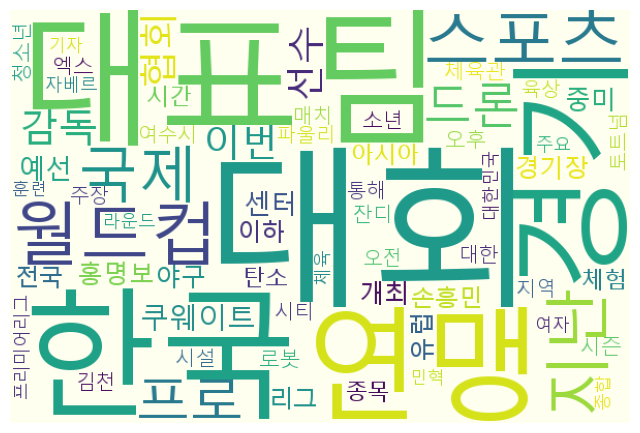

In [17]:
import json
import urllib.request
import json
import re # 정규 표현식
from konlpy.tag import Okt # 한글 품사 태깅 (Hannanum, Kkma, Komoran, .. )
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud


client_id = "yBfmPoGPjrS2BUrYnvTm"
client_secret = "4F613hH8eD"


def storeNews(searchText):
    encText = urllib.parse.quote(searchText) # 인자로 주어진 문자열에서 특수문자를 문자열로 변환(utf-8)
    url = "https://openapi.naver.com/v1/search/news.json?query=" + encText + "&display=100" # JSON 결과
    #url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        print(response_body.decode('utf-8'))
        response_body = json.loads(response_body.decode('utf-8'))
        total = response_body['total'] # 총 검색 결과 개수
        count = 0;
        jsonData = []
        print('전체 검색 수: %d개'%total)
        for item in response_body['items']:
            count = count + 1
            title = item['title'] # 뉴스 기사의 제목
            originallink = item['originallink'] # 뉴스 기사 원문의 URL
            description = item['description'] # 뉴스 기사의 내용을 요약한 패시지 정보
            jsonData.append({'count':count, 'title':title, 'originallink':originallink, 'description':description})
            with open(filePath, 'w', encoding='utf8') as fout:
                jsonFile = json.dumps(jsonData, indent=4, sort_keys=True, ensure_ascii=False)
                fout.write(jsonFile)
    else:
        print("Error Code:" + rescode)

def createWordCloud(filePath):
    contents = ''
    with open(filePath, 'r', encoding='utf8') as fin:
        descriptions = json.load(fin) # 리스트로 저장
        for description in descriptions:
            if 'description' in description.keys(): # 모든 한글 음절(가~힣)만 남기고 나머지는 공백처리
                contents += re.sub(r'[^\uAC00-\uD7A3]',' ', description['description'])
        nlp = Okt()
        nouns = nlp.nouns(contents) # 명사만 추출
        count = Counter(nouns) # 명사별 빈도수를 계산
        word_count = dict()
        for tag, counts in count.most_common(100): # 빈도수 상위 100개 중에서
            if(len(str(tag)) > 1): # 2글자 이상
                if str(tag) == searchText : continue
                word_count[tag] = counts
                #print('%s : %d개'%(tag, counts))
        font_path = 'c:/Windows/fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=font_path).get_name()
        wc = WordCloud(font_path=font_path, background_color='ivory', width=600, height=400)
        cloud = wc.generate_from_frequencies(word_count)
        plt.figure(figsize=(8,8))
        plt.imshow(cloud)
        plt.axis('off') # x축, y축이 보이지 않게 한다.
        plt.show()
        cloud.to_file('C:/Python/%s_wordcloud.jpg'%searchText)


searchText = input('검색할 단어 입력: ')
filePath = 'C:/Python/naver_news_%s.json'%searchText
storeNews(searchText)
createWordCloud(filePath)
